## 1️⃣ Load and Explore the Data
In this section, we will load the Titanic dataset and display some basic information about it.


In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first 5 rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2️⃣ Understand the Data Structure and Missing Values
In this section, we will check the dataset structure, data types, and missing values.


In [3]:
# Display dataset shape (number of rows and columns)
print(f"Dataset Shape: {df.shape}")

# Show dataset information (column names, data types, and non-null counts)
df.info()

# Count missing values in each column
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values Per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
C

## 3️⃣ Data Cleaning and Handling Missing Values
In this section, we will handle missing values and remove unnecessary columns.


In [4]:
# Fill missing Age values with the median age
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing Embarked values with the most frequent value
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop the Cabin column as it has too many missing values
df.drop(columns=["Cabin"], inplace=True)

# Verify that missing values are handled
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## 4️⃣ Exploratory Data Analysis (EDA)
In this section, we will visualize the dataset to understand relationships and patterns.


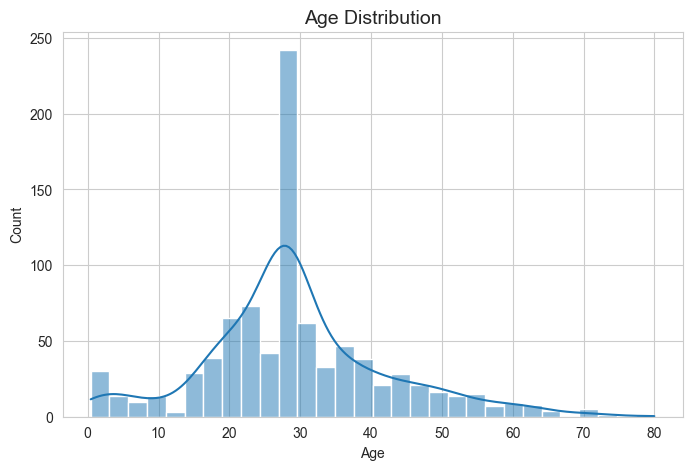

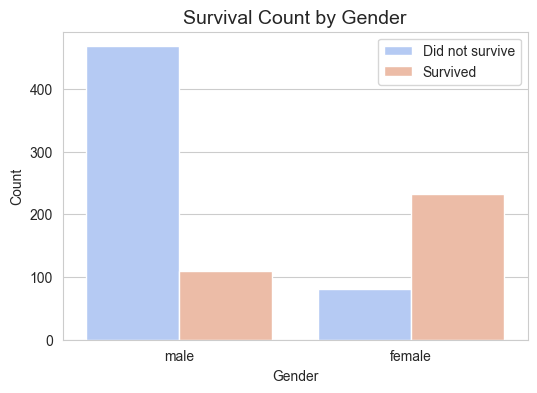

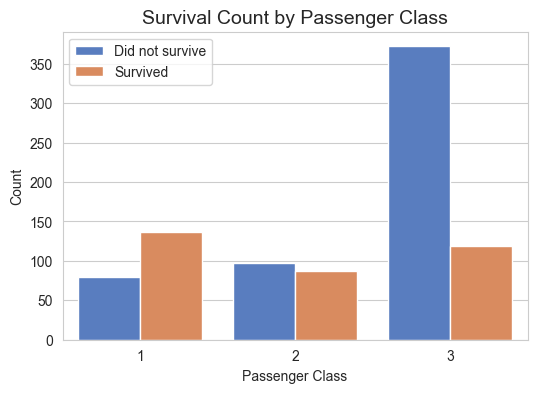

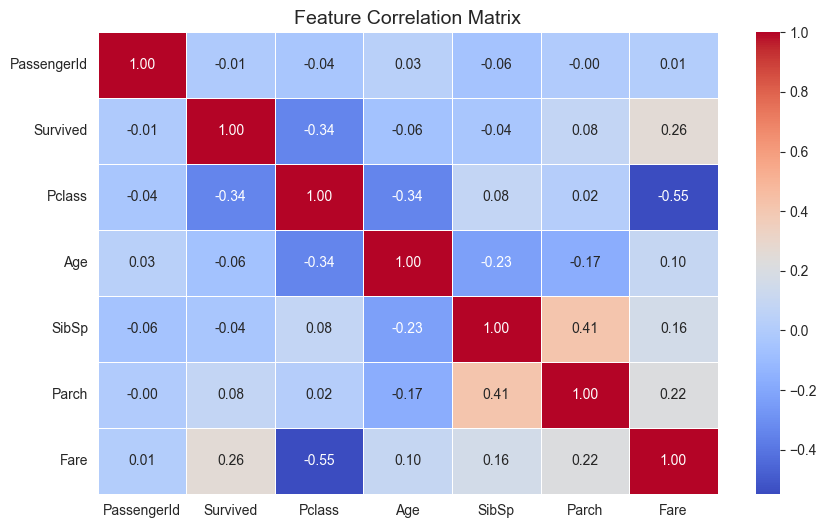

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style for better visualization
sns.set_style("whitegrid")

# Plot the distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Count plot of Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival Count by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

# Count plot of Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="muted")
plt.title("Survival Count by Passenger Class", fontsize=14)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did not survive", "Survived"])
plt.show()

# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()


## 5️⃣ Data Preprocessing
In this section, we will convert categorical data into numerical format and split the dataset for training and testing.


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables (Sex and Embarked)
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])  # Male = 1, Female = 0
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])  # Convert port names to numbers

# Define independent variables (X) and target variable (y)
X = df.drop(columns=["Survived", "Name", "Ticket"])  # Drop irrelevant columns
y = df["Survived"]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (712, 8)
Testing Set Shape: (179, 8)


## 6️⃣ Building the Machine Learning Model
In this section, we will train a Logistic Regression model to predict survival.


In [8]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=500)  # Increase iterations for better convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[90 15]
 [19 55]]


## 7️⃣ Saving the Model 
In this section, we will save the trained model for future use.


In [7]:
import joblib

# Save the trained model
joblib.dump(model, "titanic_survival_model.pkl")

print("Model saved successfully as 'titanic_survival_model.pkl'")


Model saved successfully as 'titanic_survival_model.pkl'


# 8️⃣ Model Testing

After training the model, it's crucial to test it on new data to verify its performance.  
In this step, we will load the trained model and use it to predict the survival of a sample passenger.  


In [8]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("titanic_survival_model.pkl")

# Prepare a sample test case
test_data = pd.DataFrame({
    "PassengerId": [99999], 
    "Pclass": [3],  
    "Sex": [1],  
    "Age": [25.0],  
    "SibSp": [0],  
    "Parch": [0],  
    "Fare": [7.25],  
    "Embarked": [2]  
})

# Make a prediction
prediction = model.predict(test_data)

# Print the result
print("Predicted Survival:", "Survived" if prediction[0] == 1 else "Not Survived")


Predicted Survival: Survived
